<a href="https://colab.research.google.com/github/nikitas25644/Machine-Learning/blob/main/Copy_of_ICG_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import where
from collections import Counter

In [ ]:
url1='train.csv'
train = pd.read_csv(url1)
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [ ]:
url2='test.csv'
test=pd.read_csv(url2)
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


Extracting out the id column from test data and later using it for prediction of datasets

In [ ]:
id=test.iloc[:,0].values
id

array([    1,     2,     3, ..., 58919, 58920, 58921])

In [ ]:
test

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425
...,...,...,...,...,...,...,...,...,...,...
58916,58917,75078,4565,117961,118386,121961,118784,117906,290919,118786
58917,58918,6977,72209,117961,118225,124948,118054,118054,117887,118055
58918,58919,39262,6114,117961,118343,6104,118278,118260,290919,118279
58919,58920,1023,8674,117961,118327,120318,118321,117906,290919,118322


In [ ]:
x = train.iloc[:, 1:11].values
y = train.iloc[:, 0].values      #breaking training datas into Action and other characteristics of employees and storing them into variables
Test=test.drop('id',axis=1)       
x_Test=Test.iloc[:,:].values
x_Test

array([[ 78766,  72734, 118079, ..., 118177,  19721, 117880],
       [ 40644,   4378, 117961, ..., 122008, 118398, 118865],
       [ 75443,   2395, 117961, ..., 301534, 249618, 118175],
       ...,
       [ 39262,   6114, 117961, ..., 118260, 290919, 118279],
       [  1023,   8674, 117961, ..., 117906, 290919, 118322],
       [ 44977,   3918, 117961, ..., 133686, 118424, 119435]])

In [ ]:
#splitting tarining and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)

In [ ]:

X=test.iloc[:,1:]
pred=classifier.predict(X)
pred                              #predicting the test datas after extracting the id coloumn

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
A=test['id'].values
A

array([    1,     2,     3, ..., 58919, 58920, 58921])

In [ ]:
final=pd.DataFrame(list(zip(A,pred)),columns=['ID','ACTION'])
final

,ID,ACTION
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
58916,58917,1
58917,58918,1
58918,58919,1
58919,58920,0


In [ ]:
final.to_csv('submission.csv',index=False)

ANALYSIS OF THE DATASETS BY PLOTTING THE FINAL RESULT:


Counter({1: 30872, 0: 1897})


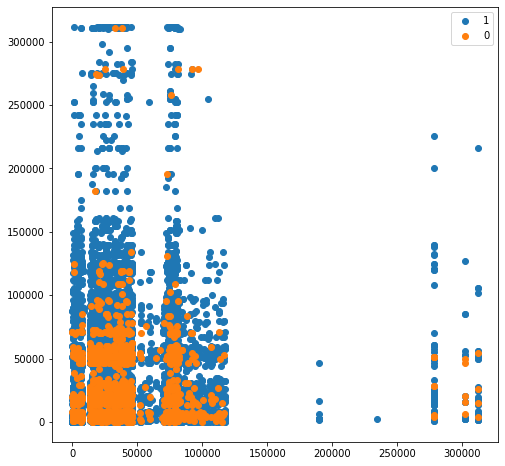

In [ ]:
analysis=plt.subplots(1,1,figsize=(8,8))
counter=Counter(y)
print(counter)         #checking out the no. of zeros and ones in the final prediction datasets
for label, _ in counter.items():
	row_ix = where(y == label)[0]              
	plt.scatter(x[row_ix, 0], x[row_ix, 1],label=str(label))
plt.legend()
plt.show()